In [ ]:
#Import the necessary libraries first

import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

In [ ]:
data = '/content/drive/MyDrive/brain tumor detection from mri/brain_tumor_dataset'
No_brain_tumor = '/content/drive/MyDrive/brain tumor detection from mri/brain_tumor_dataset/no'
Yes_brain_tumor = '/content/drive/MyDrive/brain tumor detection from mri/brain_tumor_dataset/yes'

In [ ]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
  filelist=os.listdir(i)
  for f in filelist:
    filepath=os.path.join (i,f)
    filepaths.append(filepath)
    labels.append(j)

In [ ]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
#df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
#df.head()
df

,filepaths,labels
0,/content/drive/MyDrive/brain tumor detection f...,No
1,/content/drive/MyDrive/brain tumor detection f...,No
2,/content/drive/MyDrive/brain tumor detection f...,No
3,/content/drive/MyDrive/brain tumor detection f...,No
4,/content/drive/MyDrive/brain tumor detection f...,No
...,...,...
248,/content/drive/MyDrive/brain tumor detection f...,Yes
249,/content/drive/MyDrive/brain tumor detection f...,Yes
250,/content/drive/MyDrive/brain tumor detection f...,Yes
251,/content/drive/MyDrive/brain tumor detection f...,Yes


In [ ]:
df['labels']=pd.get_dummies(df['labels'])

In [ ]:
df

,filepaths,labels
0,/content/drive/MyDrive/brain tumor detection f...,1
1,/content/drive/MyDrive/brain tumor detection f...,1
2,/content/drive/MyDrive/brain tumor detection f...,1
3,/content/drive/MyDrive/brain tumor detection f...,1
4,/content/drive/MyDrive/brain tumor detection f...,1
...,...,...
248,/content/drive/MyDrive/brain tumor detection f...,0
249,/content/drive/MyDrive/brain tumor detection f...,0
250,/content/drive/MyDrive/brain tumor detection f...,0
251,/content/drive/MyDrive/brain tumor detection f...,0


<Figure size 288x288 with 0 Axes>

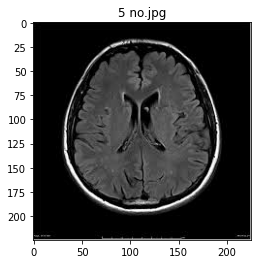

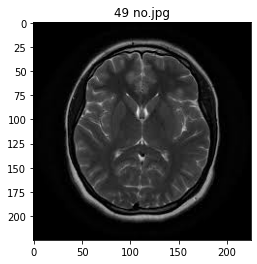

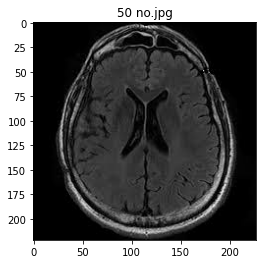

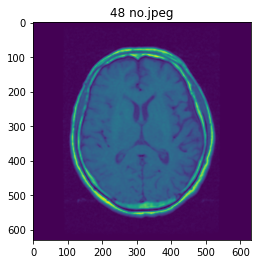

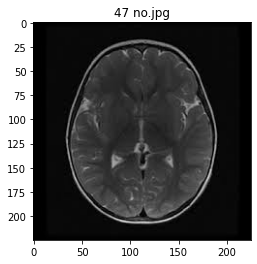

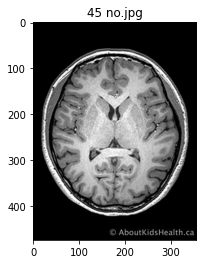

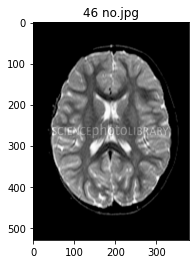

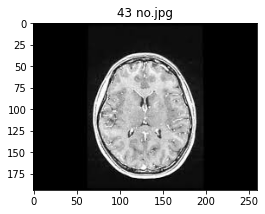

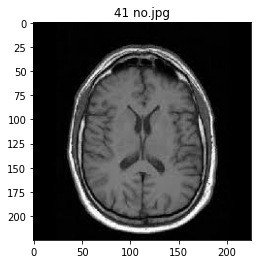

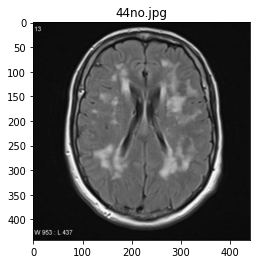

In [ ]:
plt.figure(figsize=(4,4))
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

In [ ]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


In [ ]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image

In [ ]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
#   print(path)
#   print(cancer)
# brain_tumor_dataset/no/1 no.jpeg
# No
# brain_tumor_dataset/no/10 no.jpg
# No
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [ ]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [ ]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [ ]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


In [ ]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ANN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 78400)            

In [ ]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 50s 2s/step - loss: 0.7706 - accuracy: 0.6484 - val_loss: 0.5221 - val_accuracy: 0.7843
Epoch 2/10
21/21 [==============================] - 48s 2s/step - loss: 0.5876 - accuracy: 0.7138 - val_loss: 0.4906 - val_accuracy: 0.8235
Epoch 3/10
21/21 [==============================] - 47s 2s/step - loss: 0.5591 - accuracy: 0.7532 - val_loss: 0.4286 - val_accuracy: 0.8235
Epoch 4/10
21/21 [==============================] - 48s 2s/step - loss: 0.4711 - accuracy: 0.7750 - val_loss: 0.4286 - val_accuracy: 0.8431
Epoch 5/10
21/21 [==============================] - 48s 2s/step - loss: 0.3702 - accuracy: 0.8982 - val_loss: 0.3604 - val_accuracy: 0.8627
Epoch 6/10
21/21 [==============================] - 48s 2s/step - loss: 0.2700 - accuracy: 0.9365 - val_loss: 0.3474 - val_accuracy: 0.8431
Epoch 7/10
21/21 [==============================] - 48s 2s/step - loss: 0.1481 - accuracy: 0.9496 - val_loss: 0.3600 - val_accuracy: 0.8431
Epoch 8/10
21/21 [==

Test loss: 0.5428038835525513
Test accuracy: 0.843137264251709


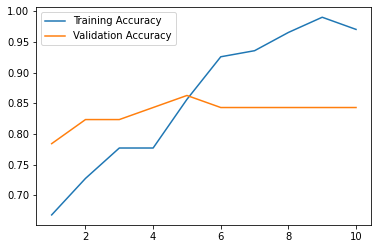

In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

THANK YOU